# *Olympic Games Data: Cleaning, Analysis, and Visualization*

### `Name & Surname: Abdulkadir Arslan`


# **Table of Contents**

### **1.Data Preparation & Manipulation**

### 1.1 Reading Datasets & Craeting DataFrames
. Datasets:
- athletes.txt
- games.tsv
- results.csv

### 1.2 Studying, Checking & Understanding The Datasets/DataFrames

###### Note: I studied and checked the datasets's files also before converting them to a dataframe.

##### 1.2.1 "athletes" dataframe overview

##### 1.2.2 "games" dataframe overview

##### 1.2.3 "results" dataframe overview

# 1.3 Consolidating & Merging DataFrames

##### 1.3.1 merging athletes and results dataframes
- The merged dataframe overview

##### 1.3.2 merging merge_res_ath and games dataframes and creating the final dataframe

- The merged dataframe overview

### **2.Answers**

###### Note: The comments/descriptions of the codes are for the codes that are placed just under them, unless told otherwise!

#### 2.1 Exercise1

- Answer1.1
- Answer1.2
- Answer1.3

#### 2.2 Exercise2

- Answer2.1
- Answer2.2
- Answer2.3
- Answer2.4

#### 2.3 Exercise3

- Answer3.1
- Answer3.2

#### 2.4 Exercise4

- Answer4

#### 2.5 Exercise5

- Answer5

### **1.Data Preparation & Manipulation**

I collected the data from datasets, created dataframes, and consolidated them in this step. 

In [294]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd

# I did not want to see the warnings because it does not look appealing so imported a module.
import warnings
warnings.filterwarnings('ignore')

# To display full output in Jupyter, not only the last result of a code cell
InteractiveShell.ast_node_interactivity = "all"

#### 1.1 Reading Datasets & Craeting DataFrames

In [295]:
athletes = pd.read_csv('athletes.txt', delimiter=";")
games = pd.read_csv('games.tsv', sep='\t')
results = pd.read_csv("results.csv")

#### 1.2 Studying, Checking & Understanding The Datasets/DataFrames
###### Note: I studied and checked the datasets's files also before converting them to a dataframe.

##### 1.2.1 "athletes" dataframe overview

In [296]:
# I also reviewed the missing values(NaN) and the data type of the columns but did not print
print(f'"athletes" dataframe has {athletes.shape} RowsxColumns')
print('\n' + '"athletes" dataframe(only the first row): ')
athletes.head(1)

"athletes" dataframe has (141856, 8) RowsxColumns

"athletes" dataframe(only the first row): 


,athlete,name,sex,born,died,affiliations,title,measurements
0,1.0,Jean-François•Blanchy,Male,"12 December 1886 in Bordeaux, Gironde (FRA)","2 October 1960 in Saint-Jean-de-Luz, Pyrénées-...",NaN,NaN,NaN


##### 1.2.2 games dataframe overview

In [297]:
# I also reviewed the missing values(NaN) and the data type of the columns but did not print
print(f'"games" dataframe has {games.shape} RowsxColumns')
print('\n' + '"games" dataframe(only the first row): ')
games.head(1)


"games" dataframe has (63, 7) RowsxColumns

"games" dataframe(only the first row): 


,year,season,games_city,games_country,games_opened,games_closed,games_remark
0,1896,Summer,Athina,Greece,1896-04-06,1896-04-15,NaN


##### 1.2.3 results dataframe overview

In [298]:
# I also reviewed the missing values(NaN) and the data type of the columns but did not print
print(f'"results" dataframe has {results.shape} RowsxColumns')
print('\n' + '"results" dataframe(only the first row): ')
results.head(1)

"results" dataframe has (50822, 10) RowsxColumns

"results" dataframe(only the first row): 


,athlete,year,season,sport,discipline,pos,medal,country,country_code,team
0,1014,2020,Summer,Table Tennis,"Singles, Women",65.0,NaN,Nigeria,NGR,NaN


#### 1.3 Consolidating & Merging DataFrames

##### 1.3.1 merging athletes and results dataframes

In [299]:
merge_res_ath = pd.merge(left=athletes, right=results, on=["athlete"], how="right")

merged dataframe(merge_res_ath) overview:

In [300]:
# I also reviewed the missing values(NaN) and the data type of the columns but did not print
print(f'"merge_res_ath" dataframe has {merge_res_ath.shape} RowsxColumns')
print('\n' + '"merge_res_ath" dataframe(only the first row): ')
merge_res_ath.head(1)

"merge_res_ath" dataframe has (50822, 17) RowsxColumns

"merge_res_ath" dataframe(only the first row): 


,athlete,name,sex,born,died,affiliations,title,measurements,year,season,sport,discipline,pos,medal,country,country_code,team
0,1014.0,Funke•Oshonaike,Female,28 October 1975 in Lagos (NGR),NaN,"Sports Club Poppenbüttel III, Hamburg, GER",NaN,167 cm / 59 kg,2020,Summer,Table Tennis,"Singles, Women",65.0,NaN,Nigeria,NGR,NaN


##### 1.3.2 merging merge_res_ath and games dataframes and creating the final dataframe

In [301]:
df = pd.merge(left=merge_res_ath, right=games, on=['year', 'season'], how="left")

the final merged dataframe "df" overview:

In [302]:
print(f'"df" dataframe has {df.shape} RowsxColumns')
print('\n' + '"df" dataframe(only the first row): ')
df.head(1)

"df" dataframe has (50822, 22) RowsxColumns

"df" dataframe(only the first row): 


,athlete,name,sex,born,died,affiliations,title,measurements,year,season,...,pos,medal,country,country_code,team,games_city,games_country,games_opened,games_closed,games_remark
0,1014.0,Funke•Oshonaike,Female,28 October 1975 in Lagos (NGR),NaN,"Sports Club Poppenbüttel III, Hamburg, GER",NaN,167 cm / 59 kg,2020,Summer,...,65.0,NaN,Nigeria,NGR,NaN,Tokyo,Japan,2021-07-23,2021-08-08,NaN


### **2.Answers**
###### Note: The comments/descriptions of the codes are for the codes that are placed just under them, unless told otherwise!

#### 2.1 Exercise1

Exercise 1.1 : What is the name of the most successful athlete since 2012, as measured by the number of gold medals?

Answer 1.1

In [303]:
numbers_of_golds = df[df.medal == "Gold"].groupby('athlete')['medal'].count().reset_index()
most_gold_medal_index = numbers_of_golds.index[numbers_of_golds['medal'] == 
                                               numbers_of_golds['medal'].max()]

best_ath_index = numbers_of_golds['athlete'].loc[most_gold_medal_index[0]]
most_succesful_athlete = df.set_index('athlete')['name'].loc[best_ath_index].iloc[0]

print(f'The name of the most successful athlete, since 2012, is: {most_succesful_athlete}')


The name of the most successful athlete, since 2012, is: Michael•Phelps


Exercise 1.2 : How many different athletes have participated in the Olympic Games since 2012?

Answer 1.2

In [304]:
ath_total_numbers  = results.athlete.nunique()

print(f'{ath_total_numbers} athletes have participates in the Olympic Games since 2012')

29655 athletes have participates in the Olympic Games since 2012


Exercise 1.3 : What are the 10 countries with the lowest ratio of female participants? Represent this information using a bar chart.

Answer 1.3

<Axes: title={'center': 'Top 10 Countries with Lowest Female Participation Ratios'}, xlabel='country'>

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Female Participation Ratio')

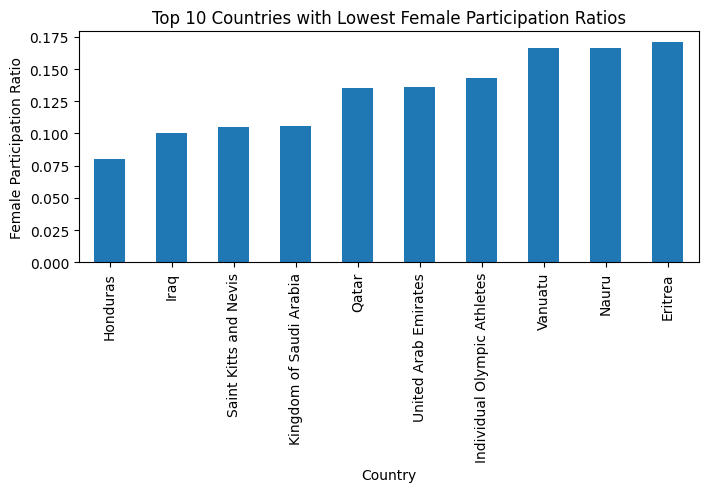

In [305]:
import matplotlib.pyplot as plt

sex_ratio_by_country = df.groupby('country')['sex'].value_counts(normalize=True)
female_ratio = sex_ratio_by_country.unstack().fillna(0)['Female'].sort_values(ascending=True)
lowest_female_attend = female_ratio.head(10)

lowest_female_attend.plot(kind="bar",
            title="Top 10 Countries with Lowest Female Participation Ratios", figsize=(8, 3))
plt.xlabel('Country')
plt.ylabel('Female Participation Ratio')

#### 2.2 Exercise2

Exercise 2.1 : What are the three most common firstnames of female athletes from the country ‘Republic of Korea’?

Answer 2.1

In [306]:
korean_female_ath = df[(df['country'] == 'Republic of Korea') & (df['sex'] == 'Female')]
korean_female_ath['first_name'] = korean_female_ath['name'].apply(lambda x: x.split('•')[1])
popular_three_name = korean_female_ath['first_name'].value_counts()[0:3]

print( f'The three most common -first names- of female athletes from Republic of Korea are: {popular_three_name}')


The three most common -first names- of female athletes from Republic of Korea are: first_name
Hye-Jin    12
Ji-Hui     10
Ji-Yeon     9
Name: count, dtype: int64


Exercise 2.2 : Who is the tallest female athlete? Provide the name, height, country and sport.

Answer 2.2

In [307]:
female_athletes = df[df['sex'] == 'Female']
# the method .extract('(\d+)') is used to extract only the integer part of height
# from the 'measurments' column
female_athletes['height'] = female_athletes['measurements'].str.extract('(\d+)').astype(float)
tallest_female_athlete = female_athletes[female_athletes['height'] ==
                                          female_athletes['height'].max()]

desired_features = tallest_female_athlete[['name', 'height', 'country', 'sport']].iloc[0]

print('The tallest female athlete is:')
print(f'{desired_features}')

The tallest female athlete is:
name                          Wei•Wei
height                          206.0
country    People's Republic of China
sport                     Basketball 
Name: 45303, dtype: object


Exercise 2.3 : What are the 10 sports with the highest average weight of participants? Provide the sport and the weight.

Answer 2.3

In [308]:
remove_NaNs = df.dropna(subset=['measurements'])

# the method .extract('(\d+) kg') is used to extract only the integer part of weight
# from the 'measurments' column
remove_NaNs['weight'] = remove_NaNs['measurements'].str.extract('(\d+) kg').astype(float)

ave_weight_by_sport = remove_NaNs.groupby('sport')['weight'].mean().reset_index()
ave_weight_by_sport = ave_weight_by_sport.sort_values(by='weight', ascending=False)

ten_highest_weights = ave_weight_by_sport.head(10)
ten_highest_weights.columns = ['Sport', 'Ave. Weight/kg']

print("The 10 sports with the highest average weight of participants are:")
ten_highest_weights


The 10 sports with the highest average weight of participants are:


,Sport,Ave. Weight/kg
11,Bobsleigh,93.904545
0,3x3 Basketball,90.500000
8,Basketball,87.092564
7,Baseball,86.666667
61,Water Polo,85.910632
31,Handball,82.876325
36,Luge,81.003145
41,Rowing,80.387898
60,Volleyball,80.311239
33,Ice Hockey,80.188865


Exercise 2.4 : What are the 3 sports with the largest number of participants that are severely underweight? Provide the sport and the number of severely underweight participants. Severe underweight is defined by a body-mass-index (BMI) smaller than 16, where BMI is calculate as weight/height^2 in the unit kg/m^2.

Answer 2.4

In [309]:
df['height'] = df['measurements'].str.extract('(\d+)').astype(float)
df['weight'] = df['measurements'].str.extract('(\d+) kg').astype(float)

unique_ath = df.drop_duplicates(subset="athlete")

unique_ath['BMI'] = (unique_ath['weight'] /  (unique_ath['height'] / 100) ** 2)

severely_underweight_participants = unique_ath[unique_ath['BMI'] < 16]

sports_are_severely_underweight_participants = severely_underweight_participants['sport'].value_counts().reset_index()
sports_are_severely_underweight = severely_underweight_participants['sport'].value_counts().reset_index()
sports_are_severely_underweight.columns = ['Sport', 'Severely Underweight Participants Number']
sports_are_severely_underweight = sports_are_severely_underweight.sort_values(by='Severely Underweight Participants Number', ascending=False)

the_3_sports_with_largest_severely_underweight = sports_are_severely_underweight.head(3)
print("The 3 sports with the largest number of participants that are severely underweight are:")
the_3_sports_with_largest_severely_underweight

The 3 sports with the largest number of participants that are severely underweight are:


,Sport,Severely Underweight Participants Number
0,Rhythmic Gymnastics,8
1,Athletics,7
2,Figure Skating,3


#### 2.3 Exercise3

For the following two questions you need to calculate the age of particantants. We define age as the number of completed years at the beginning of the Olympic Games at which the athlete participates. To calculate the age you need to (1) leverage the information about the date of birth and you (2) need to consider the date when the Olympic Games were opened

Exercise 3.1: Who is the oldest athlete? Provide the name and the age.

Answer 3.1

In [310]:
df['games_opened'] = pd.to_datetime(df['games_opened'], format='%Y-%m-%d')

df['born'] = df['born'].str.extract(r'(\d{1,2}\s\w+\s\d{4})')
df['born'] = pd.to_datetime(df['born'], format="%d %B %Y")
df['age'] = (df['games_opened'] - df['born']).dt.days // 365

oldest_athlete = df[df['age'] == df['age'].max()]

In [311]:
print("The oldest athlete is:")
print("Name:", oldest_athlete["name"].iloc[0])
print("Age:", oldest_athlete["age"].iloc[0])

The oldest athlete is:
Name: Hiroshi•Hoketsu
Age: 71


Exercise 3.2: What are the 10 sports with the highest average age of participants? Provide the sport and the average age.

Answer 3.2

In [312]:
ave_age_by_sport = df.groupby('sport')['age'].mean().reset_index()
ave_age_by_sport = ave_age_by_sport.sort_values(by='age', ascending=False)

top_10_sports_highest_ave_age = ave_age_by_sport.head(10)
top_10_sports_highest_ave_age.columns = ['Sport', 'Average Age']

print('\n' + "The 10 sports with the highest average age of participants are:")
top_10_sports_highest_ave_age



The 10 sports with the highest average age of participants are:


,Sport,Average Age
25,Equestrian Jumping,38.510896
23,Equestrian Dressage,38.192568
24,Equestrian Eventing,37.089431
44,Shooting,30.950299
16,Curling,29.512438
9,Beach Volleyball,29.460714
7,Baseball,29.393333
30,Golf,28.965957
20,Cycling Road,28.675472
11,Bobsleigh,28.548753


# 2.4 Exercise4

Exercise 4: Calculate the medal table for the Summer Olympic Games 2016 in Rio de Janeiro. See the official medal table as a reference. Your medal table should have the same structure (same column names and same orting) as the official medal table. Display the top 10 countries.

Answer 4

In [313]:
summer_2016_rio = df[(df["games_city"] == "Rio de Janeiro") & (df["year"] == 2016)]

team_events = summer_2016_rio.groupby(['sport', 'discipline'])['team'].count().reset_index()
team_events = team_events[team_events['team'] > 1]

total_medals = summer_2016_rio[~summer_2016_rio.duplicated(subset=
                                    ['country', 'sport', 'discipline', 'medal'], keep='first')]

countries_medal = total_medals.groupby('country')['medal'].value_counts().unstack(fill_value=0).reset_index()
countries_medal_sorted = countries_medal.sort_values(['Gold', 'Silver', 'Bronze', 'country'], ascending=[False, False, False, True])
countries_medal_sorted['Total'] = countries_medal_sorted['Gold'] + countries_medal_sorted['Silver'] + countries_medal_sorted['Bronze']

top_10_countries = countries_medal_sorted.head(10)
top_10_countries['Rank'] = range(1, 11)
top_10_countries.set_index('Rank', inplace=True)
top_10_countries.columns.name = None
top_10_countries.rename(columns={'country': 'NOC'}, inplace=True)
desired_order = ['NOC', 'Gold', 'Silver', 'Bronze', 'Total']
top_10_countries = top_10_countries[desired_order]

print("The Medal Table for the Summer Olympic Games 2016 in Rio de Janeiro:")
top_10_countries

The Medal Table for the Summer Olympic Games 2016 in Rio de Janeiro:


,NOC,Gold,Silver,Bronze,Total
Rank,,,,,
1,United States,46,37,38,121
2,Great Britain,27,23,17,67
3,People's Republic of China,26,18,26,70
4,Russian Federation,19,17,20,56
5,Germany,17,10,15,42
6,Japan,12,8,21,41
7,France,10,18,14,42
8,Republic of Korea,9,3,9,21
9,Italy,8,12,8,28


#### 2.5 Exercise5

Exercise 5: Using population data, calculate a new medal table for the 2016 Rio Olympics, showing medals per capita for the top 10 countries.

Answer 5

In [314]:
##I downloaded the "countries_population_2016.csv" dataset from a link(World Bank API Indicators) that I found
##by digging Worldbank API documentation link that has been provided in task1.pdf. And, I added 
##the new link I found under the References section of the content. I also loaded the data set I dwonloaded
##into the zip file that I uploaded to Moodle.
population_data = pd.read_csv("countries_population_2016.csv")

team_events = summer_2016_rio.groupby(['sport', 'discipline'])['team'].count().reset_index()
team_events = team_events[team_events['team'] > 1]
total_medals = summer_2016_rio[~summer_2016_rio.duplicated(subset=['country', 'sport', 'discipline', 'medal'], keep='first')]
medals_by_country = total_medals.groupby("country")["medal"].value_counts().unstack(fill_value=0)

medals_per_capita = pd.merge(left=medals_by_country, right=population_data, left_on= ['country'], right_on=["Country Name"], how="inner")

medals_per_capita["2016 [YR2016]"] = medals_per_capita["2016 [YR2016]"].astype(float)

medals_per_capita["Gold_per_Million"] = (medals_per_capita["Gold"] / medals_per_capita["2016 [YR2016]"]) * 1000000
medals_per_capita["Silver_per_Million"] = (medals_per_capita["Silver"] / medals_per_capita["2016 [YR2016]"]) * 1000000
medals_per_capita["Bronze_per_Million"] = (medals_per_capita["Bronze"] / medals_per_capita["2016 [YR2016]"]) * 1000000

medals_per_capita["Total_per_Million"] = (medals_per_capita["Gold_per_Million"]+ medals_per_capita["Silver_per_Million"]+ medals_per_capita["Bronze_per_Million"])
print("The New Medal Table for the Summer Olympic Games 2016 in Rio de Janeiro:")

final_medal_table = medals_per_capita.sort_values(['Gold_per_Million', 'Silver_per_Million', 'Bronze_per_Million'], ascending= False).head(10)
final_medal_table["Rank"] = range(1, len(final_medal_table) + 1)
final_medal_table.set_index("Rank",inplace=True)
final_medal_table.drop(columns=["Bronze", "Silver", "Gold", "Country Code","Series Name", "Series Code", "2016 [YR2016]"], inplace=True)
final_medal_table.rename(columns={'Country Name': 'NOC'}, inplace=True)
final_medal_table

The New Medal Table for the Summer Olympic Games 2016 in Rio de Janeiro:


,NOC,Gold_per_Million,Silver_per_Million,Bronze_per_Million,Total_per_Million
Rank,,,,,
1,The Bahamas,2.525406,0.000000,2.525406,5.050811
2,Jamaica,2.140797,1.070398,0.713599,3.924794
3,Croatia,1.197792,0.718675,0.479117,2.395583
4,Fiji,1.088885,0.000000,0.000000,1.088885
5,New Zealand,0.848518,1.909166,1.060648,3.818332
6,Hungary,0.815160,0.305685,0.407580,1.528425
7,Bahrain,0.709390,0.709390,0.000000,1.418781
8,Kosovo,0.562570,0.000000,0.000000,0.562570
9,Georgia,0.536552,0.268276,1.073104,1.877932
